<a href="https://colab.research.google.com/github/chihab216/Implementation-from-scratch-of-svm-and-gradient-descent/blob/master/SVM_Khnifass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

The dataset is an artificial dataset create by the teacher

In [ ]:
from google.colab import files
files.upload()

In [ ]:
pip install cvxopt

## We see the data

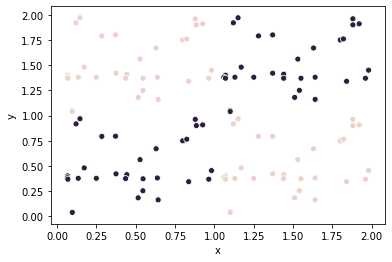

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
data = pd.read_csv ('app_svmc1.txt', delimiter="\t", header=0, names=["x","y","Y"])
#print(data)
sns.scatterplot(x=data["x"], y=data['y'], hue=data['Y'],data=data,legend=False)








     pcost       dcost       gap    pres   dres
 0: -2.7901e+01 -7.4716e+01  3e+02  1e+01  2e+00
 1: -6.5574e+01 -1.0854e+02  2e+02  6e+00  1e+00
 2: -1.9770e+02 -2.4953e+02  2e+02  6e+00  9e-01
 3: -3.2167e+02 -3.8860e+02  2e+02  5e+00  8e-01
 4: -5.3555e+02 -6.1182e+02  2e+02  3e+00  4e-01
 5: -5.1748e+02 -5.3615e+02  4e+01  4e-01  6e-02
 6: -5.0942e+02 -5.1448e+02  7e+00  4e-02  7e-03
 7: -5.1099e+02 -5.1108e+02  1e-01  4e-04  7e-05
 8: -5.1104e+02 -5.1104e+02  1e-03  4e-06  7e-07
 9: -5.1104e+02 -5.1104e+02  1e-05  4e-08  7e-09
Optimal solution found.


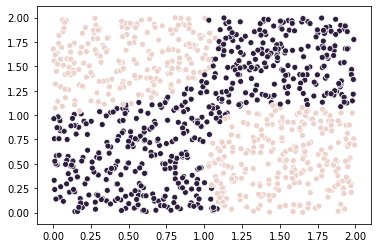

In [ ]:
#we choose a function for the kernel which is a gaussian kernel
def kernel(x,y):#sigma=0.5
  return(np.exp(-(np.linalg.norm(x-y)**2)/(2*0.5**2)))
#We calcule G To found the list of optimal Lagrange multipliers
def G(x,y):
  n=len(y)
  G=np.zeros((n,n)) 
  for i in range (n):
    for j in range (n):
      G[i][j] = y[i]*y[j]*kernel(x[i],x[j])
  return(G)


X=np.array(data[['x','y']].values)
Y=np.array(data['Y'].values)
import cvxopt
from cvxopt import matrix
from cvxopt import solvers

#Resolution of the dual 
n_samples = len(Y)
P = cvxopt.matrix(G(X,Y))
# q = -1 (1xN)
q = cvxopt.matrix(np.ones(n_samples) * -1)
# A = y^T 
A = cvxopt.matrix(Y, (1, n_samples))
# -1 (NxN)
G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
# 0 (1xN)
h = cvxopt.matrix(np.zeros(n_samples))
# b = 0 
b = cvxopt.matrix(0.0)

solution = cvxopt.solvers.qp(P, q, G, h, A, b)

a=np.ravel(solution['x'])#list of optimal Lagrange multipliers or  lambdas

#calculation of the optimal separator
def Hopt(t):#b=0.4 au hasard 
  k=0
  for i in range (n_samples):
    k=k+a[i]*Y[i]*kernel(X[i],t) 
  return(k+0.4)  

def predict(Hopt):  
  if Hopt<0:
    return(-1)
  if Hopt>0:
    return(1)

Xnew=np.random.rand(1000,2)*2
#Ynew is artificially calculate with Hopt of Xnew
Ynew=[predict(Hopt(Xnew[i])) for i in range (1000)]

sns.scatterplot(x=Xnew[:,0], y=Xnew[:,1], hue=Ynew,data=data,legend=False)


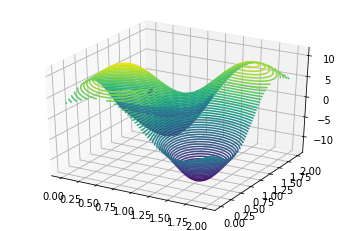

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

x = np.linspace(0, 2, 50)

X1, Y1 = np.meshgrid(x, x)

Z = np.apply_along_axis(Hopt, 2, np.stack((X1, Y1), axis=2))

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.contour3D(X1, Y1, Z, 50)
plt.show()



In [ ]:
#Calcul de la matrice de confusion (vraie positif,faux positif,vraie negatif,faux positif)
dataTest= pd.read_csv ('tst_svmc1.txt', delimiter="\t", header=0, names=["x","y","Y"])
Xtest=np.array(dataTest[['x','y']].values)
Ytest=np.array(dataTest['Y'].values)

Ypred = [predict(Hopt(Xtest[i])) for i in range (len(Xtest[:,1]))]

def confMat(Ypred,Ytest):
  TP=0
  TN=0
  FP=0
  FN=0
  for i in range (len(Ypred)):
    if Ypred[i]==1:
      if Ytest[i]==Ypred[i]:
        TP=TP+1
      else:
        FP=FP+1
    if Ypred[i]==-1:
      if Ytest[i]==Ypred[i]:
        TN=TN+1
      else:
        FN=FN+1
  print("TruePos : TrueNeg : FalsePos : FalseNeg")
  return((TP,TN,FP,FN))

print(confMat(Ypred,Ytest))

print(confMat(Ypred,Ytest)[0]/(confMat(Ypred,Ytest)[0]+confMat(Ypred,Ytest)[2]))
print("est la precison du svm")

TruePos : TrueNeg : FalsePos : FalseNeg
(17, 17, 3, 2)
TruePos : TrueNeg : FalsePos : FalseNeg
TruePos : TrueNeg : FalsePos : FalseNeg
TruePos : TrueNeg : FalsePos : FalseNeg
0.85
est la precison du svm


le nombre de svm est de:
11
les svm sont


array([  6.7613927 ,  12.03305309,  13.35405847,  13.63886513,
        23.41963318,  25.24438286,  26.89846081,  28.90821572,
        95.89187745, 369.50685248, 406.42995133])

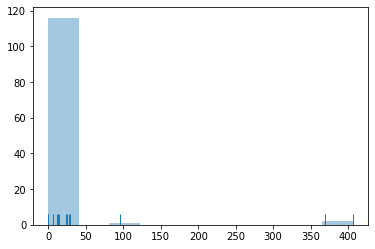

In [ ]:
import matplotlib
#les svm proche de 0
listelambda=a
nombreDe0=0
for i in range (len(a)):
  if a[i]<0.01:
    nombreDe0+=1
    listelambda[i]=0

sns.distplot(listelambda, kde=False, rug=True);
print("le nombre de svm est de:")
print(len(listelambda)-nombreDe0)
print("les svm sont")
np.unique(listelambda)[1:]


TruePos : TrueNeg : FalsePos : FalseNeg
(17, 17, 3, 2)
TruePos : TrueNeg : FalsePos : FalseNeg
TruePos : TrueNeg : FalsePos : FalseNeg
TruePos : TrueNeg : FalsePos : FalseNeg
0.85
est la precison du svm


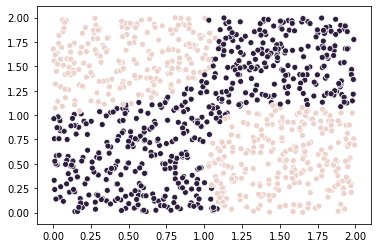

In [ ]:
def HoptSansLambdaNull(t):#b=0.4 calcul du separateur optimal sans les lambdas nul
  k=0
  for i in range (n_samples):
    if listelambda[i] != 0:
      k=k+listelambda[i]*Y[i]*kernel(X[i],t) 
  return(k+0.4)  

Ynewslambdanull=[predict(HoptSansLambdaNull(Xnew[i])) for i in range (1000)]

sns.scatterplot(x=Xnew[:,0], y=Xnew[:,1], hue=Ynewslambdanull,data=data,legend=False)

Ypredsanslambdanull = [predict(HoptSansLambdaNull(Xtest[i])) for i in range (len(Xtest[:,1]))]

print(confMat(Ypredsanslambdanull,Ytest))

print(confMat(Ypredsanslambdanull,Ytest)[0]/(confMat(Ypredsanslambdanull,Ytest)[0]+confMat(Ypredsanslambdanull,Ytest)[2]))
print("est la precison du svm")


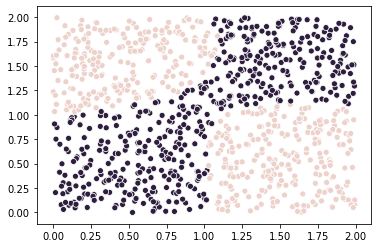

In [ ]:
#Avec b optimal (b=la moyenne des targets)
bopt = np.mean(Y)
def Hoptb(t):#b= bopt
  k=0
  for i in range (n_samples):
    k=k+a[i]*Y[i]*kernel(X[i],t) 
  return(k+bopt)  

Xnew=np.random.rand(1000,2)*2

Ynew=[predict(Hoptb(Xnew[i])) for i in range (1000)]

sns.scatterplot(x=Xnew[:,0], y=Xnew[:,1], hue=Ynew,data=data,legend=False)



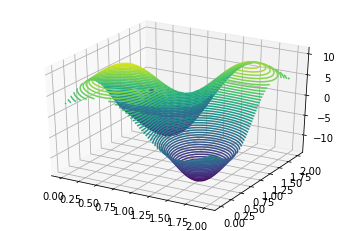

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
#graph3D du plan separateur avec b optimal
x = np.linspace(0, 2, 50)

X1, Y1 = np.meshgrid(x, x)

Z = np.apply_along_axis(Hoptb, 2, np.stack((X1, Y1), axis=2))

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.contour3D(X1, Y1, Z, 50)
plt.show()



In [ ]:
YpredAvecboptimal = [predict(Hoptb(Xtest[i])) for i in range (len(Xtest[:,1]))]
print(confMat(YpredAvecboptimal,Ytest))

print(confMat(YpredAvecboptimal,Ytest)[0]/(confMat(YpredAvecboptimal,Ytest)[0]+confMat(YpredAvecboptimal,Ytest)[2]))
print("est la precison du svm avec un b optimal")
print("On voit une amélioration de la précision du SVM")

TruePos : TrueNeg : FalsePos : FalseNeg
(16, 18, 2, 3)
TruePos : TrueNeg : FalsePos : FalseNeg
TruePos : TrueNeg : FalsePos : FalseNeg
TruePos : TrueNeg : FalsePos : FalseNeg
0.8888888888888888
est la precison du svm avec un b optimal
On voit une amélioration de la précision du SVM


TruePos : TrueNeg : FalsePos : FalseNeg
(16, 18, 2, 3)
TruePos : TrueNeg : FalsePos : FalseNeg
TruePos : TrueNeg : FalsePos : FalseNeg
TruePos : TrueNeg : FalsePos : FalseNeg
0.8888888888888888
est la precison du svm sans les lambdas null et avec le boptimal


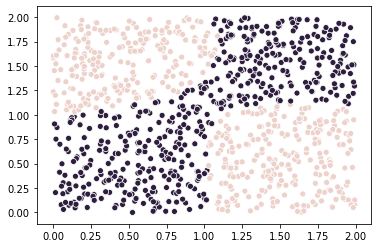

In [ ]:
def HoptSansLambdaNulletAvecb0ptimal(t):#b=boptimal calcul du separateur optimal sans les lambdas nul et avec boptimal
  k=0
  for i in range (n_samples):
    if listelambda[i] != 0:
      k=k+listelambda[i]*Y[i]*kernel(X[i],t) 
  return(k+bopt)  

Ynewslambdanull2=[predict(HoptSansLambdaNulletAvecb0ptimal(Xnew[i])) for i in range (1000)]

sns.scatterplot(x=Xnew[:,0], y=Xnew[:,1], hue=Ynewslambdanull2,data=data,legend=False)

Ypredsanslambdanull = [predict(HoptSansLambdaNulletAvecb0ptimal(Xtest[i])) for i in range (len(Xtest[:,1]))]

print(confMat(Ypredsanslambdanull,Ytest))

print(confMat(Ypredsanslambdanull,Ytest)[0]/(confMat(Ypredsanslambdanull,Ytest)[0]+confMat(Ypredsanslambdanull,Ytest)[2]))
print("est la precison du svm sans les lambdas null et avec le boptimal")
